In [2]:
import scanpy as sc
import scvelo as scv

import os
import sys
import glob
import pandas as pd
import math
import matplotlib.pyplot as plt
import anndata as ad
import numpy as np
import seaborn as sns
import celldancer as cd
import celldancer.simulation as cdsim
import celldancer.utilities as cdutil
import celldancer.cdplt as cdplt
from celldancer.cdplt import colormap
from celldancer.utilities import export_velocity_to_dynamo

from scipy.spatial.distance import cosine
from sklearn.metrics.pairwise import cosine_similarity


SEED = 2024
np.random.seed(SEED)


In [3]:
adata = sc.read_h5ad("/media/liyaru/LYR/Diff_change/8_dynamo_Data/scNT_HSC_scvelo_process.h5ad")
print(adata)

AnnData object with n_obs × n_vars = 1947 × 2000
    obs: 'batch', 'cell_type', 'time', 'nGenes', 'nCounts', 'pMito', 'pass_basic_filter', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'total_Size_Factor', 'initial_total_cell_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'Size_Factor', 'initial_cell_size', 'new_Size_Factor', 'initial_new_cell_size', 'ntr', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts'
    var: 'gene_name_mapping', 'query', 'scopes', '_id', '_score', 'symbol', 'nCells', 'nCounts', 'pass_basic_filter', 'score', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'PCs', 'batch_colors', 'cell_type_colors', 'dynamics', 'explained_variance_ratio_', 'feature_selection', 'genes_to_use', 'grid_velocity_umap', 'neighbors', 'pca_mean', 'pp', 'velocyto_SVR'
    obsm: 'X_pca', 'X_umap', 'scNT_velocity_umap', 'velocity_umap'
    layers: 'M_n', 'M_nn', 'M_s', 'M_ss', 'M_t', 'M_tn', 'M_tt', 'M_u', 'M_us', 'M_uu',

In [3]:
cdutil.adata_to_df_with_embed(adata,
                              us_para=['Mu','Ms'],
                              # cell_type_para='cell_type',
                              cell_type_para='cell_type',
                              embed_para='X_umap',
                              save_path='celldancer_input.csv'
                             )

100%|██████████| 2000/2000 [01:14<00:00, 27.01it/s]


,gene_name,unsplice,splice,cellID,clusters,embedding1,embedding2
0,AOC1,0.000000,0.0,CCACAAGCGTGC-JL12_0,Mon,14.861850,11.734772
1,AOC1,0.000000,0.0,CCATCCTGTGGA-JL12_0,Meg,14.442189,5.475870
2,AOC1,0.000000,0.0,CCCTCGGCCGCA-JL12_0,Mon,13.545568,12.149780
3,AOC1,0.019204,0.0,CCGCCCACCATG-JL12_0,Mon,11.290036,13.999574
4,AOC1,0.000000,0.0,CCGCTGTGTAAG-JL12_0,MEP-like,13.896807,10.105231
...,...,...,...,...,...,...,...
3893995,PANO1,0.000000,0.0,GTGAACCTGTGA-JL12_1,MEP-like,11.630127,9.695171
3893996,PANO1,0.000000,0.0,GTGAGACAATAC-JL12_1,MEP-like,11.894936,8.359780
3893997,PANO1,0.000000,0.0,GTGATATTGACC-JL12_1,MEP-like,11.728176,8.699327
3893998,PANO1,0.000000,0.0,GTGCCGCGACAA-JL12_1,Bas,16.423391,10.643045


In [4]:
df = pd.read_csv('celldancer_input.csv')
loss_df, cellDancer_df=cd.velocity(df,n_jobs=15,
                                   speed_up = False)

Using /media/liyaru/LYR/Diff_change/8_dynamo_Data/cellDancer_velocity_2024-05-29 09-13-40 as the output path.
Arranging genes for parallel job.
2000  genes were arranged to  134  portions.


Not predicted gene list:['AOC1', 'MAD1L1', 'DBNDD1', 'HSPB6', 'ZMYND10', 'TNFRSF12A', 'MAP3K9', 'PRSS21', 'PAX6', 'RPUSD1', 'PAX7', 'SEMA3G', 'ACP3', 'VCAN', 'MSR1', 'TNC', 'HSPA5', 'BCAR1', 'HOMER3', 'PTPRN', 'PRDM1', 'CAMK2B', 'DGAT2', 'EPN1', 'AHRR', 'BCAS1', 'NHERF2', 'ZMYND12', 'ROGDI', 'PLEKHH3', 'GAL', 'FSTL3', 'CNGB1', 'LMCD1', 'ATP6AP1', 'CDH19', 'PTGS2', 'IPCEF1', 'FOSL2', 'TUBA3D', 'ICAM3', 'MCAM', 'FBLN1', 'HOXA9', 'SLC1A3', 'SRCAP', 'SERTAD4', 'HAL', 'FAM234B', 'GCKR', 'FCN1', 'ACHE', 'ADAMTS2', 'NID2', 'SIRPG', 'MCOLN1', 'RAPGEF4', 'PITPNM3', 'HSD3B7', 'RASSF7', 'LGALS2', 'SEPTIN3', 'HMOX1', 'KCTD17', 'MMP9', 'ARFRP1', 'LIPG', 'STS', 'ABCD1', 'ELMO3', 'PLLP', 'RRN3P2', 'IQCH', 'CD276', 'PLAT', 'TUBB4A', 'RNASEH2A', 'FCER2', 'SHD', 'CACTIN', 'BABAM1', 'TMEM205', 'CAPS', 'SLC5A5', 'RAB3A', 'TMEM147', 'HAMP', 'ERF', 'PON3', 'CAV1', 'STX1A', 'CCL24', 'NPTX2', 'AGR2', 'ECM2', 'PLEKHA1', 'ASPA', 'CHRNE', 'SYNGR2', 'LGALS3BP', 'ASIC2', 'CCL2', 'ABI3', 'DLX4', 'SLC16A6', 'AREG', 

In [5]:
# check gene
t1 = df['gene_name'].value_counts()

#cellDancer_df = pd.read_csv("cellDancer_velocity_2024-02-29 11-14-06/cellDancer_estimation.csv")
t2 = cellDancer_df['gene_name'].value_counts()

# check lost gene
t = set.difference(set(t1.index.tolist()),set(t2.index.tolist()))

In [6]:
cellDancer_df=cd.compute_cell_velocity(cellDancer_df=cellDancer_df,
                                       supname= "NT-seq")

<class 'numpy.ndarray'>
[[0.         0.00417845 0.         ... 0.         0.         0.        ]
 [0.00494884 0.         0.         ... 0.00190483 0.00486077 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00596856 0.         ... 0.00041055 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
(819, 819)
Other_gene


In [7]:
cellDancer_df.to_csv('celldancer_result.csv')

In [5]:
cellDancer_df = pd.read_csv('celldancer_result.csv')
adata_cd = export_velocity_to_dynamo(cellDancer_df,adata)
print(adata_cd)
adata_cd.write_h5ad("adata/celldancer.h5ad")

AnnData object with n_obs × n_vars = 1947 × 2000
    obs: 'batch', 'cell_type', 'time', 'nGenes', 'nCounts', 'pMito', 'pass_basic_filter', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'total_Size_Factor', 'initial_total_cell_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'Size_Factor', 'initial_cell_size', 'new_Size_Factor', 'initial_new_cell_size', 'ntr', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts'
    var: 'gene_name_mapping', 'query', 'scopes', '_id', '_score', 'symbol', 'nCells', 'nCounts', 'pass_basic_filter', 'score', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'use_for_dynamics', 'use_for_transition'
    uns: 'PCs', 'batch_colors', 'cell_type_colors', 'dynamics', 'explained_variance_ratio_', 'feature_selection', 'genes_to_use', 'grid_velocity_umap', 'neighbors', 'pca_mean', 'pp', 'velocyto_SVR'
    obsm: 'X_pca', 'X_umap', 'scNT_velocity_umap', 'velocity_umap'
    layers: 'M_n', 'M_nn', 'M_s', 'M_ss', 'M_

        Consider computing the graph in an unbiased manner 
        on full expression space by not specifying basis.

computing velocity graph (using 10/20 cores)


  0%|          | 0/1947 [00:00<?, ?cells/s]

    finished (0:00:04) --> added 
    'velocity_S_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_S_umap', embedded velocity vectors (adata.obsm)
saving figure to file Figure/stream/celldancer.pdf


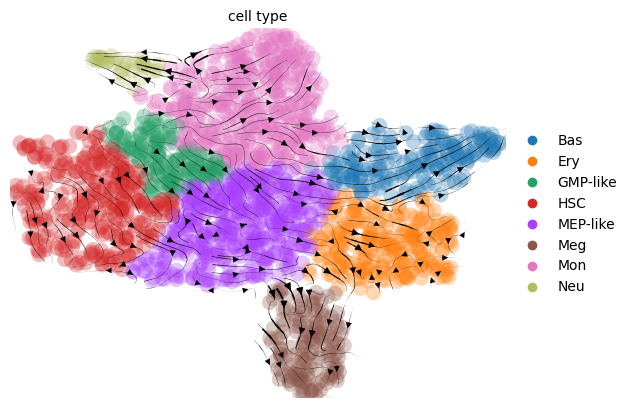

In [24]:
scv.tl.velocity_graph(adata_cd,vkey="velocity_S",n_jobs=10,basis= "umap")
scv.pl.velocity_embedding_stream(adata_cd,basis= "umap",color="cell_type",
                                 vkey="velocity_S",
                                 palette = sc.pl.palettes.default_20,
                                 legend_loc = 'right margin',
                                 save="Figure/stream/" + "celldancer.pdf" )